In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task2-oil-spills-Hessel.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/meganhessel/eds220-hw3.git


- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


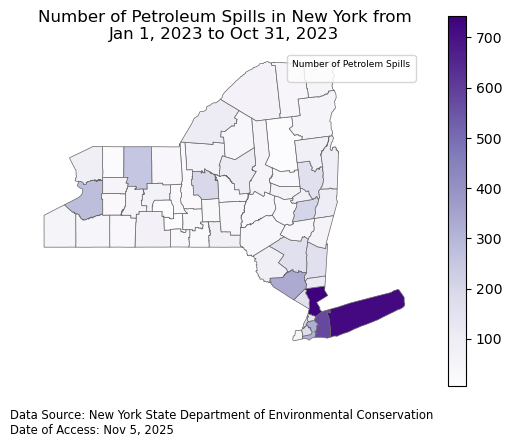

In [40]:
# Import libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Import + Load data 
fp_spill = os.path.join('data','Spill_Incidents.csv') # Spill Data
spills = pd.read_csv(fp_spill)

fp_count = os.path.join('data','tl_2023_us_county','tl_2023_us_county.shp') # County Data 
counties =  gpd.read_file(fp_count)

# DATA WRANGLING 
# Fix the column names 
spills.columns = (spills.columns
    .str.replace(" ", "_")
    .str.lower())
counties.columns = (counties.columns
    .str.replace(" ", "_")
    .str.lower())

# Change date columns types to DateTime 
spills['spill_date'] = pd.to_datetime(spills['spill_date'])
spills['received_date'] = pd.to_datetime(spills['received_date'])


# FILTER 
# Spills dataframe for: (1) between Jan 1, 2023 and Oct 31 2023 (2) only petroleum spills 
petr_23 = spills[ ((spills['spill_date'] >= '2023-01-01') & (spills['spill_date'] < '2023-10-31') & (spills['material_family'] == 'Petroleum')) ]
# County Dataframe for all New York counties 
ny_countries = counties[counties['statefp']== '36']   # (NY Current state FIPS code: 36)


# AGGREGATION 
# Dataframe with just number of spills per county 
spills_per_county = (petr_23.groupby('county')['spill_number'].count().reset_index(name = 'n_spills'))



# DATA UPDATING 
# Update the spelling mistake of St. Lawrence County 
spills_per_county.loc[spills_per_county['county'] == 'St Lawrence', 'county'] = 'St. Lawrence'
# Fix County's 'New Jersey - Region 2' to 'New Jersey'
spills_per_county.loc[spills_per_county.county == 'New Jersey - Region 2', 'county'] = 'New Jersey'


# MERGE DATAFRAMES 
# Make 'county' columns names match
ny_countries = ny_countries.rename(columns = {'name': 'county'})
# Inner Join spills and counties dataframes 
ny_counties = pd.merge(ny_countries, spills_per_county, how = 'inner', on = 'county')

# Adding 1 spill to Niagara County 
ny_counties.loc[ny_counties.county == 'Niagara', 'n_spills'] += 1


# MAPPING 
# Create an empty figure 
fig, ax = plt.subplots()
# No axis 
ax.axis('off')
# Plot 
ny_counties.plot(ax = ax, 
                column = 'n_spills', 
                cmap='Purples', 
                legend=True, 
                edgecolor = '0.4', 
                linewidth = 0.5)

# Titles, legend, and caption 
ax.set_title('Number of Petroleum Spills in New York from\nJan 1, 2023 to Oct 31, 2023')
plt.legend(title = "Number of Petrolem Spills", title_fontsize=6.5, loc = 'upper right')
plt.figtext(0.1, 0.01, 'Data Source: New York State Department of Environmental Conservation\nDate of Access: Nov 5, 2025', fontsize = 'small')

plt.show()

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

**Df 1:**

Description: Spills of petroleum and other hazardous materials in New York 

Data source: New York State Department of Environmental Conservation (Last Updated
November 6, 2025)

Data of Access: Nov 5, 2025 

**Df 2:** 

Description: All legal boundaries and names are as of January 1, 2022. 

Data source: U.S. Census Bureau (Last Revised - September 23, 2025)

Data of Access: Nov 5, 2025

## 3. Import libraries

In [3]:
# Import libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [4]:
fp_spill = os.path.join('data','Spill_Incidents.csv')
spills = pd.read_csv(fp_spill)

fp_count = os.path.join('data','tl_2023_us_county','tl_2023_us_county.shp')
counties =  gpd.read_file(fp_count)


<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [5]:
#a. Check the dataframe's head
spills.head()
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,GEOIDFQ,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [6]:
#b. Check the data types of the columns
counties.dtypes
spills.dtypes  # dates are objects 

Spill Number              int64
Program Facility Name    object
Street 1                 object
Street 2                 object
Locality                 object
County                   object
ZIP Code                 object
SWIS Code                 int64
DEC Region                int64
Spill Date               object
Received Date            object
Contributing Factor      object
Waterbody                object
Source                   object
Close Date               object
Material Name            object
Material Family          object
Quantity                 object
Units                    object
Recovered                object
dtype: object

In [7]:
# Fix the column names 
spills.columns = (spills.columns
    .str.replace(" ", "_")
    .str.lower())

counties.columns = (counties.columns
    .str.replace(" ", "_")
    .str.lower())

#c. Check the unique values in the `material_family` column
spills['material_family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
#d. Check the unique values in the `county` column
spills['county'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

Materials are petrolum, hazardous material, oxygenates.
Spills in New York.
Dates are objects (not datetimes).

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

I did this perviously... In 5.A #c

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [9]:
# Change date columns types to DateTime 
spills['spill_date'] = pd.to_datetime(spills['spill_date'])
spills['received_date'] = pd.to_datetime(spills['received_date'])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [10]:
# Filter for spills (1) between Jan 1, 2023 and Oct 31 2023 (2) only petroleum spills 
petr_23 = spills[ ((spills['spill_date'] >= '2023-01-01') & (spills['spill_date'] < '2023-10-31') & (spills['material_family'] == 'Petroleum')) ]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.


In [11]:
# Varify 2023 year filter with a print statement 
print(f"The year(s) included in this dataframe are: {petr_23.spill_date.dt.year.unique()}")

The year(s) included in this dataframe are: [2023]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [12]:
# Assert test to ensure petr_23 has only petroluem spills
assert (petr_23['material_family'] == 'Petroleum').any(), "Non-Petroleum spills found" 

# assert petr_23['material_name'] == 'Petroleum', "Material is not Petroleum"  - doesnt work because the condition returns a list, not a single string 

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [36]:
# Create dataframe with just number of spills per county 

# 2 Methods: "value_counts()" and "groupby()"
spills_per_county = (petr_23['county']
                            .value_counts() # Counts number per county  
                            .reset_index(name = 'n_spills')
                            .sort_values(by = "county")
                            .reset_index(drop = True))

spills_per_county = (petr_23.groupby('county')['spill_number'].count().reset_index(name = 'n_spills'))


spills_per_county

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,742
62,Wyoming,24


In [69]:
grader.check("q5d")

q5d results:
    q5d - 1 result:
        ❌ Test case failed
        Trying:
            def test_q3(student_data):
                try:
                    expected_data = pd.read_csv('data/q5d_df.csv').drop(columns='Unnamed: 0')
                    pd.testing.assert_frame_equal(expected_data, student_data)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q3(spills_per_county)
        Expecting nothing
        **********************************************************************
        Line 7, in q5d 0
        Failed example:
            test_q3(spills_per_county)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q5d 0[0]>", line 4, in test_q3
                pd.testing.assert_frame_equal(expected_data, student_data)
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 1303, in assert_frame_equal
                assert_series_equal(
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 1021, in assert_series_equal
                assert_numpy_array_equal(
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 696, in assert_numpy_array_equal
                _raise(left, right, err_msg)
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 690, in _raise
                raise_assert_detail(obj, msg, left, right, index_values=index_values)
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 620, in raise_assert_detail
                raise AssertionError(msg)
            AssertionError: DataFrame.iloc[:, 1] (column name="n_spills") are different

            DataFrame.iloc[:, 1] (column name="n_spills") values are different (25.0 %)
            [index]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
            [left]:  [206, 30, 143, 75, 47, 27, 55, 31, 38, 57, 60, 35, 41, 159, 283, 57, 46, 32, 51, 39, 11, 58, 108, 178, 42, 59, 42, 257, 62, 576, 6, 175, 88, 109, 198, 67, 336, 16, 68, 34, 117, 321, 105, 52, 161, 162, 78, 33, 11, 25, 65, 72, 723, 85, 28, 36, 1, 162, 81, 96, 38, 744, 24, 6]
            [right]: [206, 30, 143, 75, 47, 26, 55, 31, 38, 56, 60, 35, 41, 159, 280, 57, 46, 32, 51, 39, 11, 58, 108, 177, 42, 59, 41, 255, 62, 573, 6, 173, 88, 109, 197, 67, 333, 16, 68, 34, 117, 321, 104, 52, 161, 161, 77, 33, 11, 25, 65, 72, 721, 85, 28, 36, 1, 161, 81, 96, 38, 742, 24, 6]

            During handling of the above exception, another exception occurred:

            Traceback (most recent call last):
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q5d 0[1]>", line 1, in <module>
                test_q3(spills_per_county)
              File "<doctest q5d 0[0]>", line 6, in test_q3
                raise AssertionError('Incorrect answer.')
            AssertionError: Incorrect answer.

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

_Type your answer here, replacing this text._

In [70]:
# a Check geo-dataframe heads 
counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [71]:
# b Check the data types of the columns
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
geoidfq       object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [72]:
# c Check the geo-dataframe's CRS
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

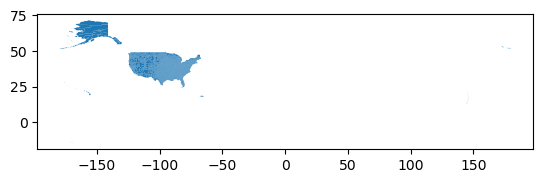

In [73]:
# d Plot the geo-dataframe
counties.plot()

CRS is EPSG:4269/ NAD83. 
Counties are all USA counties. 
Geometery is all polygons. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

I did this perviously... In 5.A #c

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

<Axes: >

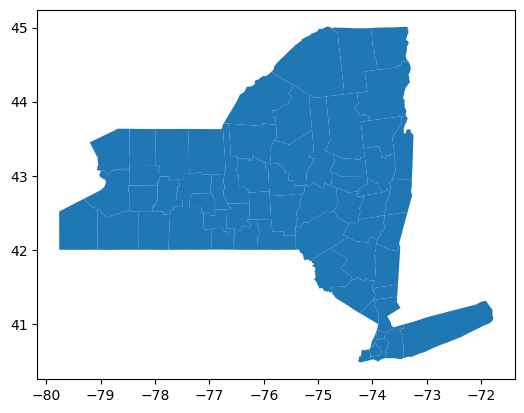

In [74]:
# Filter for all New York counties (NY Current state FIPS code: 36)
ny_countries = counties[counties['statefp']== '36']
ny_countries.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [75]:
# Listing the New York countries without repetition 
ny_countries['name'].unique()

array(['Steuben', 'Saratoga', 'Allegany', 'Oswego', 'Ulster',
       'St. Lawrence', 'Schuyler', 'Essex', 'Suffolk', 'Hamilton',
       'Dutchess', 'Otsego', 'Tompkins', 'Albany', 'Cayuga', 'Greene',
       'Herkimer', 'Warren', 'Jefferson', 'Clinton', 'Nassau', 'Madison',
       'Washington', 'Westchester', 'Lewis', 'Ontario', 'Cortland',
       'Richmond', 'Erie', 'Putnam', 'Montgomery', 'Sullivan', 'Orleans',
       'Oneida', 'Cattaraugus', 'Yates', 'Tioga', 'Monroe', 'Schoharie',
       'Broome', 'Rensselaer', 'Seneca', 'Queens', 'Genesee', 'Wayne',
       'Niagara', 'Kings', 'Chemung', 'Wyoming', 'New York', 'Columbia',
       'Chautauqua', 'Franklin', 'Onondaga', 'Chenango', 'Fulton',
       'Rockland', 'Livingston', 'Delaware', 'Orange', 'Schenectady',
       'Bronx'], dtype=object)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [76]:
# Print names of counties 
spills_per_county['county'].unique()


array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [ ]:
# Counties that have spills but are not in ny_countries 
diff_names_spills = np.setdiff1d(spills_per_county['county'], ny_countries['name']).tolist()
diff_names_spills

# SYNTAX : 
# np.setdiff1d( input_array, comparision_array, assume_unique returns )
# RETURNS: 1D array of values in ar1 that are not in ar2

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [ ]:
# Looking at the difference in lengths 
len(spills_per_county['county'].unique()) - len(ny_countries['name'].unique()) 

2

In [79]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [80]:
# Counties that are in ny_countries but no spills 
diff_names_ny = diff_names_spills = np.setdiff1d(ny_countries['name'], spills_per_county['county']).tolist()
diff_names_ny

['St. Lawrence']

In [81]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [ ]:
# e. Number of spills in Tuscarora Indian Reservation 
# 2 methods: .Sum() and .Shape

(petr_23['county'] == 'Tuscarora Indian Reservation').sum()

petr_23[petr_23['county'] == 'Tuscarora Indian Reservation'].shape[0]


1

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [ ]:
# Update the spelling mistake 
spills_per_county.loc[spills_per_county['county'] == 'St Lawrence', 'county'] = 'St. Lawrence'

# Check if it's still misspelled
spills_per_county.loc[spills_per_county['county'] == 'St Lawrence']

,county,n_spills


### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [84]:
# Fix County's 'New Jersey - Region 2' to 'New Jersey'
spills_per_county.loc[spills_per_county.county == 'New Jersey - Region 2', 'county'] = 'New Jersey'
# Check if it updated 
spills_per_county[spills_per_county['county'] == 'New Jersey - Region 2']


,county,n_spills


In [39]:
# Make 'county' columns match in both dfs by changing ny_countries's column name 
ny_countries = ny_countries.rename(columns = {'name': 'county'})
ny_countries

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,36,051,00974124,36051,0500000US36051,Livingston,Livingston County,06,H1,G4020,464,40380,None,A,1635976564,22076449,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580..."
2963,36,025,00974111,36025,0500000US36025,Delaware,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067..."
3157,36,071,00974134,36071,0500000US36071,Orange,Orange County,06,H1,G4020,408,28880,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603..."
3158,36,093,00974144,36093,0500000US36093,Schenectady,Schenectady County,06,H1,G4020,104,10580,None,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763..."


b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [ ]:
# Inner Join spills and counties dataframes 
ny_counties = pd.merge(ny_countries, spills_per_county, how = 'inner', on = 'county')
ny_counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,county,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72
1,36,091,00974143,36091,0500000US36091,Saratoga,Saratoga County,06,H1,G4020,104,10580,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",161
2,36,003,00974100,36003,0500000US36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666409356,12990521,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",30
3,36,075,00974136,36075,0500000US36075,Oswego,Oswego County,06,H1,G4020,532,45060,None,A,2464650884,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",68
4,36,111,00974153,36111,0500000US36111,Ulster,Ulster County,06,H1,G4020,408,28740,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",161



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [87]:
# Check to see if n_spills is an interger 
ny_counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
geoidfq       object
county        object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
n_spills       int64
dtype: object

In [88]:
# Looking at number of spills in Niagara - theres 88! 
ny_counties.loc[ny_counties.county == 'Niagara', 'n_spills']

# Adding 1 spill to Niagara 
ny_counties.loc[ny_counties.county == 'Niagara', 'n_spills'] += 1

# Checking to see it it worked - Worked! There is 1 more spill in Niagara! 
ny_counties.loc[ny_counties.county == 'Niagara', 'n_spills']

45    89
Name: n_spills, dtype: int64

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


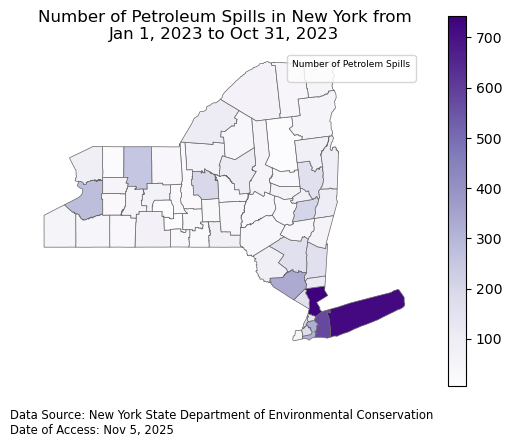

In [89]:
# Create an empty figure 
fig, ax = plt.subplots()

# No axis 
ax.axis('off')

# Plot 
ny_counties.plot(ax = ax, 
                column = 'n_spills', 
                cmap='Purples', 
                legend=True, 
                edgecolor = '0.4', 
                linewidth = 0.5)

# Titles, legend, and caption 
ax.set_title('Number of Petroleum Spills in New York from\nJan 1, 2023 to Oct 31, 2023')
plt.legend(title = "Number of Petrolem Spills", title_fontsize=6.5, loc = 'upper right')
plt.figtext(0.1, 0.01, 'Data Source: New York State Department of Environmental Conservation\nDate of Access: Nov 5, 2025', fontsize = 'small')

plt.show()

b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

The map was created by (1) filtering county geospatal data for New York and (2) counting number of petroleum spills for each New York county between Jan 1, 2023 and Oct 31, 2023. Then, the geospataial and count dataframes were merged and plotted. 

## Key takeaways:

In [ ]:
# Print statement of key takeways 
print(f"{ny_counties.loc[ny_counties.n_spills > 300, 'county'].tolist()} are NY counties that have more than 300 petroleum spills.\nThe darkest counties on the map are {ny_counties.loc[ny_counties.n_spills > 500, 'county'].tolist()} with more than 500 spills.\nThese {len(ny_counties.loc[ny_counties.n_spills > 500, 'county'].tolist())} counties are located right next to/on the Atlantic Ocean, making these spills potenetially harmful for marine ecosystem health.")

['Suffolk', 'Nassau', 'Westchester', 'Queens', 'Orange'] are NY counties that have more than 300 petroleum spills.
The darkest counties on the map are ['Suffolk', 'Nassau', 'Westchester'] with more than 500 spills.
These 3 counties are located right next to/on the Atlantic Ocean, making these spills potenetially harmful for marine ecosystem health.


## Complete workflow

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the choropleth map of the number of petroleum spills per county in the state of New York in 2023. The only ouput of this cell should be the choropleth map  you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [91]:
grader.check_all()

7Ac results:
    7Ac - 1 result:
        ❌ Test case failed
        Trying:
            assert len(diff_names_spills) == 3
        Expecting nothing
        **********************************************************************
        Line 1, in 7Ac 0
        Failed example:
            assert len(diff_names_spills) == 3
        Exception raised:
            Traceback (most recent call last):
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest 7Ac 0[0]>", line 1, in <module>
                assert len(diff_names_spills) == 3
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^
            AssertionError

    7Ac - 2 result:
        ✅ Test case passed

7Ad results: All test cases passed!

q5d results:
    q5d - 1 result:
        ❌ Test case failed
        Trying:
            def test_q3(student_data):
                try:
                    expecte